<a href="https://colab.research.google.com/github/abhishek-parashar/Reddit-flair-detection/blob/master/experiment_log_for_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### importing the required libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import datetime as dt
nltk.download('all')
from bs4 import BeautifulSoup

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

## reading the file 


In [0]:
pd.read_csv('data.csv')

,sno.,flair,title,score,id,url,comms_num,body,author,comments,timestamp,combined_features
0,0,AskIndia,4 days ago pending orders 100 million hydroxyc...,95.0,fwjdqr,https://www.reddit.com/r/india/comments/fwjdqr...,6.0,getting frantic calls pharma customers delayed...,india_ko_vanakkam,modi stockholm syndrome fair evidence chloroqu...,07-04-2020 20:07,4 days ago pending orders 100 million hydroxyc...
1,1,AskIndia,randians big time users dating apps like tinde...,18.0,fizkkk,https://www.reddit.com/r/india/comments/fizkkk...,19.0,id stint apps couple months one point didnt fe...,__knockknockturnal__,someone matched tell im fat cat 1 general foll...,15-03-2020 18:48,randians big time users dating apps like tinde...
2,2,AskIndia,r india thinks flat earthers,4.0,f25vx0,https://www.reddit.com/r/india/comments/f25vx0...,31.0,encountered foreigner ig says round earth hoax...,Dev1003,havent found indian yet believes earth flat de...,11-02-2020 17:10,r india thinks flat earthershavent found india...
3,3,AskIndia,people left 9 5 jobs pursue career music art f...,45.0,dtvliq,https://www.reddit.com/r/india/comments/dtvliq...,34.0,couldnt add askindia flair mobile browser,c0mrade34,engineer advertisement shoots since last 1year...,09-11-2019 20:57,people left 9 5 jobs pursue career music art f...
4,4,AskIndia,somebody want kill full family,92.0,b7pvwt,https://www.reddit.com/r/india/comments/b7pvwt...,24.0,24hrs local police station register case dont ...,amitkumarthakur,calm downgo sp office town file grievance imme...,01-04-2019 01:00,somebody want kill full familycalm downgo sp o...
...,...,...,...,...,...,...,...,...,...,...,...,...
1245,1213,Coronavirus,coronavirus india hunger real problem,15.0,fwk2iv,https://www.rediff.com/news/interview/coronavi...,0.0,NaN,Mulaayam_Yadav,NaN,07-04-2020 20:59,coronavirus india hunger real problemnanhttps:...
1246,1214,Coronavirus,need investigate nso group behind pegasus soft...,52.0,fyawr9,https://www.reddit.com/r/india/comments/fyawr9...,2.0,https previewreddit p3vb8eexzxr41pngwidth1024f...,InternetFreedomIn,nso group isreal would say nso make softwares ...,10-04-2020 15:25,need investigate nso group behind pegasus soft...
1247,1215,Coronavirus,coronavirus dont target doctors asking protect...,71.0,fwcvg1,https://www.thehindu.com/news/national/coronav...,2.0,NaN,naveen_reloaded,thali nhi bajai kya aur diya nhi jalaya kya hu...,07-04-2020 11:08,coronavirus dont target doctors asking protect...
1248,1216,Coronavirus,india lifts export ban potential coronavirus d...,12.0,fwkrox,https://asia.nikkei.com/Spotlight/Coronavirus/...,5.0,NaN,vinacham,sed bhakt noises deleted request let trump the...,07-04-2020 21:46,india lifts export ban potential coronavirus d...


In [0]:
data.head()

,flair,title,score,id,url,comms_num,body,author,comments,timestamp,combined_features
0,AskIndia,4 days ago pending orders 100 million hydroxyc...,95.0,fwjdqr,https://www.reddit.com/r/india/comments/fwjdqr...,6.0,getting frantic calls pharma customers delayed...,india_ko_vanakkam,modi stockholm syndrome fair evidence chloroqu...,07-04-2020 20:07,4 days ago pending orders 100 million hydroxyc...
1,AskIndia,randians big time users dating apps like tinde...,18.0,fizkkk,https://www.reddit.com/r/india/comments/fizkkk...,19.0,id stint apps couple months one point didnt fe...,__knockknockturnal__,someone matched tell im fat cat 1 general foll...,15-03-2020 18:48,randians big time users dating apps like tinde...
2,AskIndia,r india thinks flat earthers,4.0,f25vx0,https://www.reddit.com/r/india/comments/f25vx0...,31.0,encountered foreigner ig says round earth hoax...,Dev1003,havent found indian yet believes earth flat de...,11-02-2020 17:10,r india thinks flat earthershavent found india...
3,AskIndia,people left 9 5 jobs pursue career music art f...,45.0,dtvliq,https://www.reddit.com/r/india/comments/dtvliq...,34.0,couldnt add askindia flair mobile browser,c0mrade34,engineer advertisement shoots since last 1year...,09-11-2019 20:57,people left 9 5 jobs pursue career music art f...
4,AskIndia,somebody want kill full family,92.0,b7pvwt,https://www.reddit.com/r/india/comments/b7pvwt...,24.0,24hrs local police station register case dont ...,amitkumarthakur,calm downgo sp office town file grievance imme...,01-04-2019 01:00,somebody want kill full familycalm downgo sp o...


looking for the data shape 

In [0]:
data.shape

(267, 11)

names of columns

In [0]:
data.columns

Index(['flair', 'title', 'score', 'id', 'url', 'comms_num', 'body', 'author',
       'comments', 'timestamp', 'combined_features'],
      dtype='object')

In [0]:
data.head()

,flair,title,score,id,url,comms_num,body,author,comments,timestamp,combined_features
0,AskIndia,4 days ago pending orders 100 million hydroxyc...,95.0,fwjdqr,https://www.reddit.com/r/india/comments/fwjdqr...,6.0,getting frantic calls pharma customers delayed...,india_ko_vanakkam,modi stockholm syndrome fair evidence chloroqu...,07-04-2020 20:07,4 days ago pending orders 100 million hydroxyc...
1,AskIndia,randians big time users dating apps like tinde...,18.0,fizkkk,https://www.reddit.com/r/india/comments/fizkkk...,19.0,id stint apps couple months one point didnt fe...,__knockknockturnal__,someone matched tell im fat cat 1 general foll...,15-03-2020 18:48,randians big time users dating apps like tinde...
2,AskIndia,r india thinks flat earthers,4.0,f25vx0,https://www.reddit.com/r/india/comments/f25vx0...,31.0,encountered foreigner ig says round earth hoax...,Dev1003,havent found indian yet believes earth flat de...,11-02-2020 17:10,r india thinks flat earthershavent found india...
3,AskIndia,people left 9 5 jobs pursue career music art f...,45.0,dtvliq,https://www.reddit.com/r/india/comments/dtvliq...,34.0,couldnt add askindia flair mobile browser,c0mrade34,engineer advertisement shoots since last 1year...,09-11-2019 20:57,people left 9 5 jobs pursue career music art f...
4,AskIndia,somebody want kill full family,92.0,b7pvwt,https://www.reddit.com/r/india/comments/b7pvwt...,24.0,24hrs local police station register case dont ...,amitkumarthakur,calm downgo sp office town file grievance imme...,01-04-2019 01:00,somebody want kill full familycalm downgo sp o...


checking the data info

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flair              266 non-null    object 
 1   title              266 non-null    object 
 2   score              266 non-null    float64
 3   id                 266 non-null    object 
 4   url                266 non-null    object 
 5   comms_num          266 non-null    float64
 6   body               182 non-null    object 
 7   author             266 non-null    object 
 8   comments           249 non-null    object 
 9   timestamp          266 non-null    object 
 10  combined_features  266 non-null    object 
dtypes: float64(2), object(9)
memory usage: 23.1+ KB


we are getting only 266 values whereas the data has1250 rows

In [0]:
data.drop("id",axis=1,inplace=True)

In [0]:
data.head()

,flair,title,score,url,comms_num,body,author,comments,timestamp,combined_features
0,AskIndia,4 days ago pending orders 100 million hydroxyc...,95.0,https://www.reddit.com/r/india/comments/fwjdqr...,6.0,getting frantic calls pharma customers delayed...,india_ko_vanakkam,modi stockholm syndrome fair evidence chloroqu...,07-04-2020 20:07,4 days ago pending orders 100 million hydroxyc...
1,AskIndia,randians big time users dating apps like tinde...,18.0,https://www.reddit.com/r/india/comments/fizkkk...,19.0,id stint apps couple months one point didnt fe...,__knockknockturnal__,someone matched tell im fat cat 1 general foll...,15-03-2020 18:48,randians big time users dating apps like tinde...
2,AskIndia,r india thinks flat earthers,4.0,https://www.reddit.com/r/india/comments/f25vx0...,31.0,encountered foreigner ig says round earth hoax...,Dev1003,havent found indian yet believes earth flat de...,11-02-2020 17:10,r india thinks flat earthershavent found india...
3,AskIndia,people left 9 5 jobs pursue career music art f...,45.0,https://www.reddit.com/r/india/comments/dtvliq...,34.0,couldnt add askindia flair mobile browser,c0mrade34,engineer advertisement shoots since last 1year...,09-11-2019 20:57,people left 9 5 jobs pursue career music art f...
4,AskIndia,somebody want kill full family,92.0,https://www.reddit.com/r/india/comments/b7pvwt...,24.0,24hrs local police station register case dont ...,amitkumarthakur,calm downgo sp office town file grievance imme...,01-04-2019 01:00,somebody want kill full familycalm downgo sp o...


In [0]:
data.columns

Index(['flair', 'title', 'score', 'url', 'comms_num', 'body', 'author',
       'comments', 'timestamp', 'combined_features'],
      dtype='object')

In [0]:
data.tail()

,flair,title,score,url,comms_num,body,author,comments,timestamp,combined_features
262,Scheduled,hi r india made bot stop fake news whatsapp,163.0,https://www.reddit.com/r/india/comments/fdaht6...,39.0,edit 3 looks like blocked facebook fuck try sp...,whatsappfactchecker,make bot subs reddit know want mean stop fake ...,04-03-2020 17:16,hi r india made bot stop fake news whatsappmak...
263,Scheduled,get full refund jet airways international flig...,15.0,https://www.reddit.com/r/india/comments/bdbpz3...,18.0,hi question people well versed flight cancella...,CurlyMope,call ask looks even worse day dayhttps livefro...,15-04-2019 11:59,get full refund jet airways international flig...
264,Scheduled,seattle city council becomes first us legislat...,371.0,https://www.reddit.com/r/india/comments/eykwsp...,87.0,resolution tabled january 21st council members...,ali_sez_so,going us thanks detailed selfpost nri bhakts b...,04-02-2020 13:10,seattle city council becomes first us legislat...
265,Scheduled,confusion train schedule could someone please ...,8.0,https://www.reddit.com/r/india/comments/di6as1...,5.0,booked counter ticket madgaonmumbai cst 12134 ...,ExaltFibs24,simple train currently running monsoon schedul...,15-10-2019 19:03,confusion train schedule could someone please ...
266,Scheduled,punjab dalit labourer beaten forced drink urin...,495.0,https://indianexpress.com/article/india/chandi...,136.0,NaN,ClassicAdvice5,looked good youngone blessed men longer among ...,19-11-2019 19:04,punjab dalit labourer beaten forced drink urin...


In [0]:
def string(value):
    return str(value)

In [0]:
data['title'] = data['title'].apply(string)
data['body'] = data['body'].apply(string)
data['comments'] = data['comments'].apply(string)

In [0]:

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
def text_cleaning(text):
   
    text = BeautifulSoup(text, "lxml").text
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub('', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text

In [0]:
combined_features = data["title"] + data["comments"] + data["url"]
data = data.assign(combined_features = combined_features)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flair              266 non-null    object 
 1   title              267 non-null    object 
 2   score              266 non-null    float64
 3   url                266 non-null    object 
 4   comms_num          266 non-null    float64
 5   body               267 non-null    object 
 6   author             266 non-null    object 
 7   comments           267 non-null    object 
 8   timestamp          266 non-null    object 
 9   combined_features  266 non-null    object 
dtypes: float64(2), object(8)
memory usage: 21.0+ KB


In [0]:
data1=pd.read_csv('data (1).csv')

In [0]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         1218 non-null   int64 
 1   flair              1218 non-null   object
 2   title              1218 non-null   object
 3   score              1218 non-null   int64 
 4   id                 1218 non-null   object
 5   url                1218 non-null   object
 6   comms_num          1218 non-null   int64 
 7   body               693 non-null    object
 8   author             1218 non-null   object
 9   comments           1096 non-null   object
 10  timestamp          1218 non-null   object
 11  combined_features  1218 non-null   object
dtypes: int64(3), object(9)
memory usage: 114.3+ KB


### by this we find that body has a lot of null values. This shows that for most of the posts only the title suffice, there is no need of body. 
### plots can be made for the posts having body and no of words in such posts this would give more insights to the data. 
### second in the list which has missing values is comments. This is quite resonable as not all the posts get comments, next thing which can be checked is what is the score of the post with comments and what flair are the posts which get maximum comments. 


#### graphs which we can plot to get more insights of the data 
#### 1. plots of different feature values and which feature value has missing values.
#### 2. NO of posts and the flair they belong that have body.
#### 3. No of words in the body corresponding to the flairs- this will help us determine is body a good parameter or not for model.
#### 4. score of the posts with comments
#### 5. flair which gets maximum comments - this will help us in model 
#### 6. what are thw words or persons mentioned maximum times in comments
#### 7, what is the frequency of posts and comments.

AttributeError: ignored

In [0]:
data=pd.read_csv('datafinal.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         1218 non-null   int64 
 1   flair              1218 non-null   object
 2   title              1218 non-null   object
 3   score              1218 non-null   int64 
 4   id                 1218 non-null   object
 5   url                1218 non-null   object
 6   comms_num          1218 non-null   int64 
 7   body               693 non-null    object
 8   author             1218 non-null   object
 9   comments           1096 non-null   object
 10  timestamp          1218 non-null   object
 11  combined_features  1218 non-null   object
dtypes: int64(3), object(9)
memory usage: 114.3+ KB


In [7]:
data['flair'].value_counts()

Science/Technology    100
Photography           100
Policy/Economy        100
Non-Political         100
Business/Finance      100
Food                  100
AskIndia              100
Sports                100
Scheduled             100
Coronavirus           100
Politics              100
AMA                   100
[R]eddiquette          18
Name: flair, dtype: int64

In [6]:
data['flair'].unique()

array(['AskIndia', 'Non-Political', '[R]eddiquette', 'Scheduled',
       'Photography', 'Science/Technology', 'Politics',
       'Business/Finance', 'Policy/Economy', 'Sports', 'Food', 'AMA',
       'Coronavirus'], dtype=object)

In [0]:
x=data.count()

In [0]:
data.drop('id',axis=1,inplace=True)

In [0]:
import seaborn as sns

In [0]:
y=data.columns

In [11]:
print(y)

Index(['Unnamed: 0', 'flair', 'title', 'score', 'url', 'comms_num', 'body',
       'author', 'comments', 'timestamp', 'combined_features'],
      dtype='object')


In [0]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [0]:
y=data.columns

In [0]:
x=data.count()

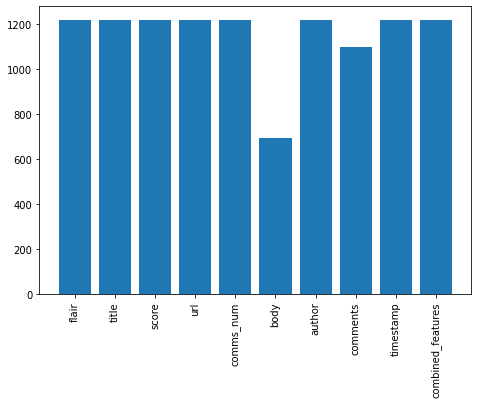

In [0]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
features = y 
values = x
ax.bar(y,x)
plt.xticks(rotation=90)
plt.savefig('value.png', dpi=300, bbox_inches='tight')
plt.show()

In [0]:
data['flair'].value_counts()

Coronavirus           100
Food                  100
Photography           100
Science/Technology    100
Business/Finance      100
Politics              100
Sports                100
AMA                   100
Non-Political         100
AskIndia              100
Policy/Economy        100
Scheduled             100
[R]eddiquette          18
Name: flair, dtype: int64

### thus [R]eddiquette  has minimum no of flairs rest all have equal flairs it is quite obvious as the eddiquette does not change much 

In [0]:
df=pd.DataFrame(data)

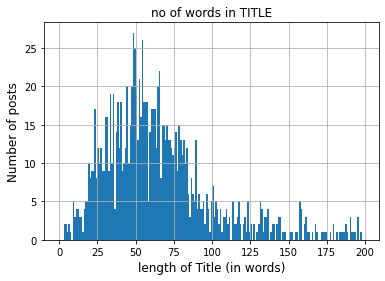

In [15]:
temp = df['title'].str.len()
temp.hist(bins = np.arange(0,200,1))
plt.title("no of words in TITLE")
plt.xlabel("length of Title (in words)", fontsize=12)
plt.ylabel("Number of posts", fontsize=12)
plt.savefig('title.png', dpi=300, bbox_inches='tight')
plt.show()

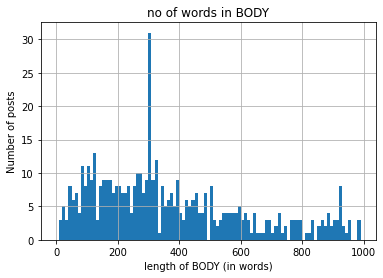

In [18]:

temp = df['body'].str.len()
temp.hist(bins = np.arange(0,1000,10))
plt.title("no of words in BODY")
plt.xlabel("length of BODY (in words)")
plt.ylabel("Number of posts")
plt.savefig('lenth of words in body.png', dpi=300, bbox_inches='tight')
plt.show()